# Statistical Mechanics Midterm Asignment
## Felix Semler
## S3898547

TODO: Add version of py wiht package versions below



Notation:
I use $\mathcal{Z}$ for the partition function due to habit

### A:

Using the Quantum Harmonic oscillator formulation we know that the energy levels are:
\begin{equation}
 E_n = (n+\frac{1}{2}) \hbar\omega
\end{equation}

As we are modelling N 3-dimensional coupled oscillators, or equivalently 3N 1-dimensional independent oscillators with differing oscillation frequencies we require that omega be the average oscillation frequency denoted as $\omega_E$

Furthermore, we can get rid of the $E_0$ energy as it is constant and does not contribute to the thermodynamic properties

We define the partition function for a discrete ensemble as :
\begin{equation}
 \mathcal{Z} \equiv \sum_{n} e^{-E_n\beta}
\end{equation}

So we can write:
\begin{equation}
 \mathcal{Z} = \sum_{n=0}^{\infty} e^{-n\hbar\omega_E\beta}
\end{equation}

for individual phonons.

As our phonons are independent (or assumed to be so) a system with 3N vibrational modes will be the product of each phonons partition function

\begin{equation}
 \mathcal{Z} = \prod_{k=1}^{3N} \mathcal{Z}_k
\end{equation}

We can rewrite our individual phonon partition function using:
\begin{equation}
 \sum_{x=0}^{\infty} e^{cx} = \frac{1}{1-e^c}
\end{equation}

Which gives us:
\begin{equation}
 \mathcal{Z}_k = \sum_{n=0}^{\infty} e^{-n\hbar\omega_E\beta} =  \frac{ 1}{1-e^{-\hbar\omega_E\beta}}
\end{equation}

So that the systems partition function is:

\begin{equation}
 \mathcal{Z} = \prod_{k=1}^{\infty} \frac{ 1}{1-e^{-\hbar\omega_E\beta}}
\end{equation}


### B:

The average occupational number is given as:
\begin{equation}
\braket{n_i}=-\frac{1}{\beta}\frac{\partial}{\partial (\hbar \omega_i)} \log \mathcal{Z}
\end{equation}

Now to work this out:
\begin{equation}
\log\mathcal{Z} = - \sum_{i=1}^{3N} \log(1-e^{-\hbar\beta\omega_i})
\end{equation}

\begin{equation}
\frac{\partial}{\partial \hbar\omega_i}  \log(1-e^{-\hbar\beta\omega_i}) = \frac{-\beta e^{-\beta\hbar\omega_i}}{1-e^{-\hbar\beta\omega_i}}
\end{equation}

So we get:

\begin{equation}
\braket{n_i}=-\frac{\beta}{\beta}\frac{e^{-\beta\hbar\omega_i}}{e^{-\hbar\beta\omega_i}-1}
\end{equation}

Which becomes:

\begin{equation}
\braket{n_i}=\frac{1}{e^{\hbar\beta\omega_i}-1}
\end{equation}

### C:

Internal Energy is given as:
\begin{equation}
U = -\frac{\partial}{\partial \beta}\log \mathcal{Z}
\end{equation}

For the entire system
\begin{equation}
\frac{\partial}{\partial \beta}\log \mathcal{Z} = -\sum_{i=1}^{3N} \frac{\hbar \omega_i}{e^{\beta\hbar\omega_i}-1}
\end{equation}

So we have:
\begin{equation}
U    = \sum_{i=1}^{3N} \frac{\hbar \omega_i}{e^{\beta\hbar\omega_i}-1}
\end{equation}


## D: 
To define the heat capacity we need to find the internal energy stored per unit Volume per unit temperature T.

To this end we assume an infinite Volume substance containing 3N phonons, so we utilize this requirement for the number of normal modes:
\begin{equation}
\int^{\omega_m}_0 V\frac{3\omega^2}{2\pi^2c^3}\ d\omega=3N
\end{equation}

so if we want the total energy of all 3N phonons we write:
\begin{equation}
 U = \frac{3V}{2\pi^2 c^3}\int^{\omega_m}_0 d\omega\ \omega^2\frac{\hbar\omega}{e^{\beta\hbar\omega}-1}
\end{equation}

Which we rewrite as:
\begin{equation}
\frac{U}{N} = \frac{9(kT)^4}{(\hbar \omega_m)^3}\int^{\beta \hbar \omega_m}_0 \frac{t^3}{e^t-1}\ dt
\end{equation}
The integral including the prior division by a variable cubed is defined as the Debye function $D(x)$ which can be solved for $x>>1$ and $x<<1$. 
From the above expression we define the debye temperature as 
\begin{equation}
kT_D = \hbar\omega_m = \hbar c \left(\frac{6\pi^2}{v}\right)^{1/3}
\end{equation}
The two solution regimes then are:

\begin{equation}
\frac{U}{N} = 3kTD(\lambda) =
\begin{cases}
3kT\left(1-\frac{3}{8}\frac{T_D}{T}+...\right) & \text{for }    (T>>T_D) \\
3kT\left(\frac{\pi^4}{5}\left[\frac{T}{T_D}\right]^3+\mathcal{O}(e^{-T_D/T})\right) & \text{for }   (T<<T_D)
\end{cases}
\end{equation}

where $\lambda=T_D/T$


The heat capacity can be found using:
\begin{equation}
C_v = \frac{\partial U}{\partial T}
\end{equation}
which gives

\begin{equation}

\frac{C_V}{Nk}= 
    \begin{cases}
        3\left(1-\frac{1}{20}\frac{T_D}{T}^2+...\right) &   \text{for } (T>>T_D) \\
        \frac{12\pi^4}{5}\left(\frac{T}{T_D}\right)^3+\mathcal{O}(e^{-T_D/T}) &  \text{for } (T<<T_D)
    \end{cases}
\end{equation}


## E:

In [1]:
import numpy as np
import scipy
import scipy.constants as cst

In [2]:
#Temperature in K - Specific Heat (cal/mol/K)
data = np.loadtxt('./diamond.dat', delimiter=' ', skiprows=2)

Conversion const. 4184 J/cal

Here the equation from slide 28 lecture 11 will be utilized (with k moved to the other side)

note that our heat capacity is specific, so that it is equivalent to $C_V/mol=C_V/N_A=C_V/N$ since $mol = N_A$ particles and $N_A=N$ for these measurements

dAbove doesnt seem to be true --> Said will be fixed in Tuesday lecture

In [3]:
x_dat = data[:,0] 
y_dat = data[:,1]*4.184/(3*cst.k*cst.Avogadro)#/ () # cal-> J and move constants over



def heat_capactity(T, T_E):
    return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


#Alternate form
#def heat_capactity(T, T_E):
#    return T_E**2*(1/(np.sinh(T_E/2*T)**2))/(4*T**2)


# Low T form:
#def heat_capactity(T, T_E):
#    return (T_E/T)**2 * (np.exp(-T_E/T) )# / ((np.exp(T_E/T))-1)**2 )


T_E, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat,p0=[298])
T_E=T_E[0]

/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in exp
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: invalid value encountered in divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in square
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


In [4]:
T_E_diamond = T_E 
T_E

709.7827025809898

## F:

In [5]:
def integral(t):
    return t**3/(np.exp(t)-1)

def D(x):
    # Solver uses array so element wise integrate
    return 3/(x**3)*[scipy.integrate.quad(integral,0,i)[0] for i in x]

def Debye_temp(T,T_D):
    # Equation from Book pae 285 - moved exponent aroun a little - also note the lack of a 3 
    return (4*D(T_D/T)- (3*T_D/T*np.exp(-T_D/T))/(1-np.exp(-T_D/T)))


T_D, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat,p0=[298])
T_D=T_D[0]

/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in exp
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: invalid value encountered in divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in square
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )


In [6]:
T_D_diamond = T_D
T_D

709.7827025809898

## G:

/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in exp
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in square
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: invalid value encountered in divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/3692881796.py:2: RuntimeWarning: overflow encountered in exp
  return t**3/(np.exp(t)-1)


Text(0.5, 1.0, 'Normalized heat capacity vs normalized temperature for a diamond')

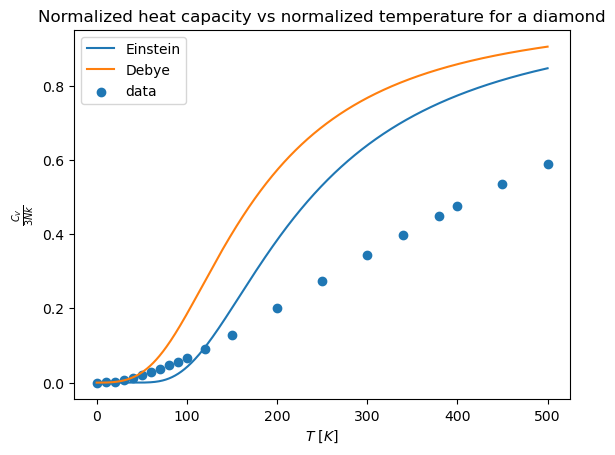

In [17]:
import matplotlib.pyplot as plt
x = np.linspace(0.1,x_dat.max(),1000)
plt.plot(x,heat_capactity(x, T_E=T_E), label='Einstein')
plt.plot(x,Debye_temp(x, T_D=T_D), label='Debye')
plt.scatter(x_dat,y_dat,label='data')
plt.xlabel(r'$T\ [K]$')
plt.ylabel(r'$\frac{C_V}{3Nk}$') 
plt.legend()
plt.title('Normalized heat capacity vs normalized temperature for a diamond')

Here one can see that the Einstein and Debye fits are quite close to each other, the Debye model starts ascending a little earlier than the Einstein model, generally Debye predicts a little higher than Einstein. Neither of the models provide a very good fit, the central temperature range is quite far from the prediction, the general shape is provided by both models however the gradient change is far stronger for both models. The best fit is given here by einstein, however, its not significantly better than Debye.

## H

/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in square
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: overflow encountered in exp
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/2021903912.py:7: RuntimeWarning: invalid value encountered in divide
  return (T_E/T)**2 * ((np.exp(T_E/T) ) / ((np.exp(T_E/T))-1)**2 )
/tmp/ipykernel_40006/3692881796.py:2: RuntimeWarning: overflow encountered in exp
  return t**3/(np.exp(t)-1)


Text(0.5, 1.0, 'Normalized heat capacity vs temperature for graphite')

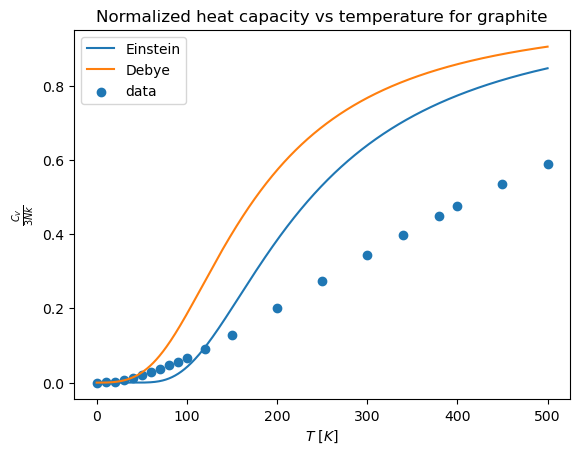

In [18]:
data = np.loadtxt('./graphite.dat', delimiter=' ', skiprows=2)
x_dat = data[:,0] 
y_dat = data[:,1]/(3*cst.k*cst.Avogadro)#/ () # already in Joules
T_E, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat,p0=[298])
T_E=T_E[0]
T_E_graph = T_E
T_D, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat,p0=[298])
T_D=T_D[0]
T_D_graph = T_D

x = np.linspace(0.1,x_dat.max(),1000)
plt.plot(x,heat_capactity(x, T_E=T_E), label='Einstein')
plt.plot(x,Debye_temp(x, T_D=T_D), label='Debye')
plt.scatter(x_dat,y_dat,label='data')
plt.xlabel(r'$T\ [K]$')
# Unitless
plt.ylabel(r'$\frac{C_V}{3Nk}$') 
plt.legend()
plt.title('Normalized heat capacity vs temperature for graphite')

Diamond is a strongly interconnected molecule with symmetries along several spacial axes, graphite on the other hand tends to only form connections along one plane. Since these models are developed for 3N phonons, one inherently assumes interconnection along more than 1 plane as this does not descirbe graphite particularly well one achieves poorer fitting results

## J:

Entropy at room temperature NTP: 293.15 K 

Entropy can be found using:
\begin{equation}
    S = \int^{T}_0 \frac{C_V}{T} dT
\end{equation}
where the debye specific heat capacity in the NTP limit ($T<<T_D$) is found by:
\begin{equation}
\frac{C_V}{Nk} = \frac{12\pi^4}{5}\left(\frac{T}{T_D}\right)^3 + \mathcal{O}(e^{-T_D/T})
\end{equation}
So we have

\begin{equation}
    S = Nk\frac{12\pi^4}{5 T_D^3}\int^{T}_0  T^2 dT
\end{equation}
which becomes:
\begin{equation}
    S = Nk\frac{12\pi^4}{5 T_D^3}  \frac{T^3}{3}
\end{equation}

In [16]:
def entropy_debye(T_D, N=cst.Avogadro, T=293.15):
    return N*cst.k*12*np.pi**4*T**3/(5*T_D**3*3)
print('Diamond entropy:  {:.10} [J/K]'.format(entropy_debye(T_D = T_D_diamond)))
print('Graphite entropy: {:.10} [J/K]'.format(entropy_debye(T_D = T_D_graph)))

Diamond entropy:  45.64751335 [J/K]
Graphite entropy: 45.6475115 [J/K]
